# Matplotlib Histograms


In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

In [2]:
from scipy import stats

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = randn(100)

(array([ 3.,  4.,  8.,  4., 21., 17., 27., 11.,  3.,  2.]),
 array([-2.36820099, -1.87836922, -1.38853746, -0.8987057 , -0.40887393,
         0.08095783,  0.57078959,  1.06062135,  1.55045312,  2.04028488,
         2.53011664]),
 <a list of 10 Patch objects>)

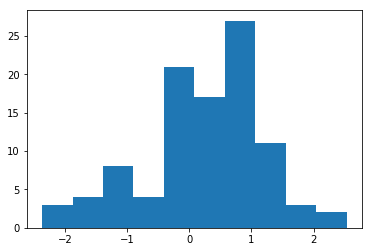

In [5]:
#Default is 10 bins
plt.hist(data,bins = 10)

(array([ 2.,  1.,  4., 21., 21., 13.,  8.,  5.,  3.,  2.]),
 array([-2.70977181, -2.16562821, -1.62148462, -1.07734103, -0.53319743,
         0.01094616,  0.55508975,  1.09923335,  1.64337694,  2.18752053,
         2.73166413]),
 <a list of 10 Patch objects>)

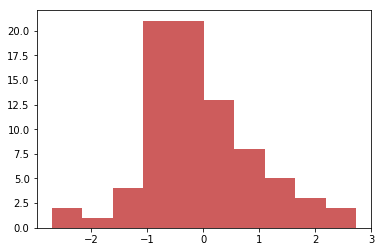

In [6]:
data2 = randn(80)
plt.hist(data2,color = "indianred")

C:\Users\yashm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\yashm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.04594376, 0.04594376, 0.        , 0.04594376, 0.09188751,
        0.09188751, 0.55132506, 0.4134938 , 0.59726882, 0.36755004,
        0.36755004, 0.22971878, 0.13783127, 0.22971878, 0.18377502,
        0.04594376, 0.09188751, 0.04594376, 0.04594376, 0.04594376]),
 array([-2.70977181, -2.43770001, -2.16562821, -1.89355642, -1.62148462,
        -1.34941282, -1.07734103, -0.80526923, -0.53319743, -0.26112564,
         0.01094616,  0.28301796,  0.55508975,  0.82716155,  1.09923335,
         1.37130514,  1.64337694,  1.91544874,  2.18752053,  2.45959233,
         2.73166413]),
 <a list of 20 Patch objects>)

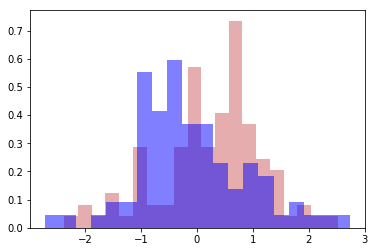

In [7]:
plt.hist(data,normed = True,color = "indianred",alpha = 0.5,bins = 20)
plt.hist(data2,normed = True,color = "blue",alpha = 0.5,bins = 20)

# Seaborn Histogram

In [8]:
Data1 = randn(1000)
Data2 = randn(1000)

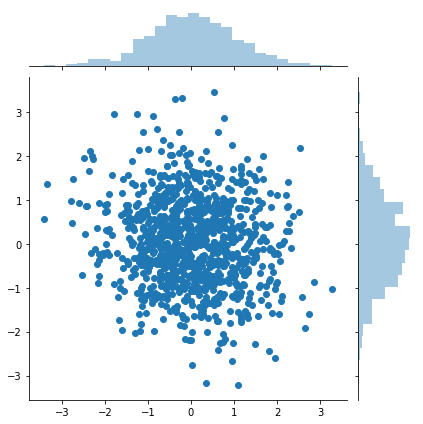

In [9]:
sns.jointplot(Data1,Data2)

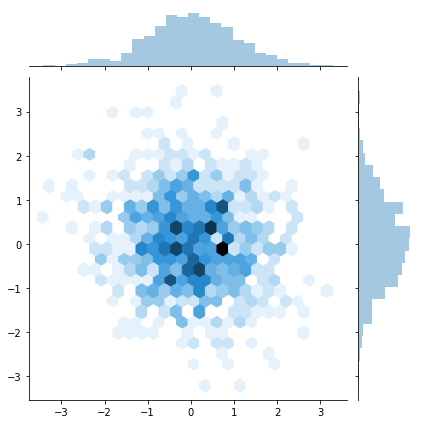

In [10]:
sns.jointplot(Data1,Data2,kind = 'hex')

# Kernel Density Estimation plots

In [11]:
data = randn(100)

(0, 1)

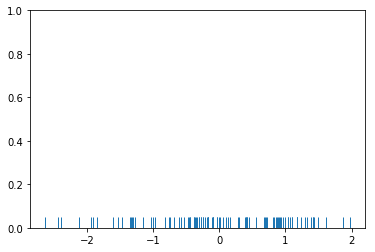

In [12]:
sns.rugplot(data)
plt.ylim(0,1)

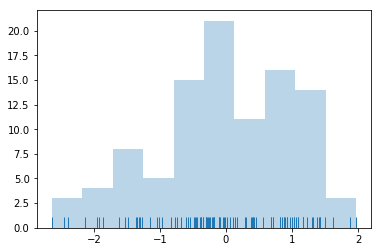

In [13]:
plt.hist(data,alpha = 0.3)
sns.rugplot(data)


(0, 1)

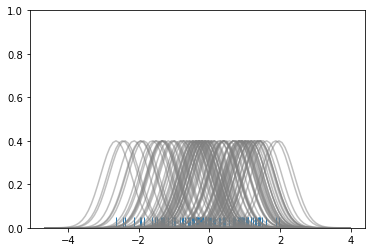

In [14]:
#manual kde
sns.rugplot(data)

x_min = data.min()-2
x_max = data.max()+2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = (((4*data.std()**5))/(3*len(data)))**0.2

kernel_list = []

for data_point in data:
    #Create a kernel and append it into kernel list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel*0.4
    
    plt.plot(x_axis,kernel,color = 'grey',alpha = 0.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of all basis functions')

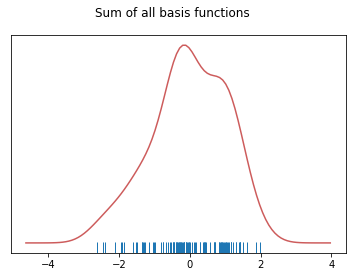

In [15]:
sum_of_kde = np.sum(kernel_list,axis = 0)

fig = plt.plot(x_axis,sum_of_kde,color = 'indianred')

sns.rugplot(data)

plt.yticks([])

plt.suptitle('Sum of all basis functions')

# Seaborn KDE

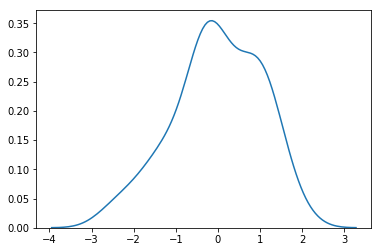

In [16]:
sns.kdeplot(data)

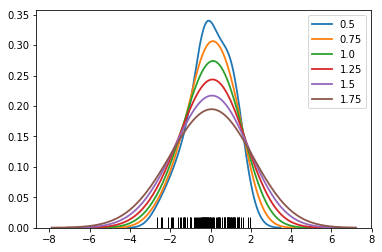

In [17]:
#To adjust badwidth
sns.rugplot(data,color = 'black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(data, bw = bw, lw = 1.8, label  = bw)

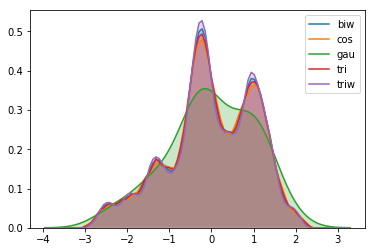

In [18]:
kernel_options = ['biw','cos','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(data,kernel = kern , label = kern , shade = True)

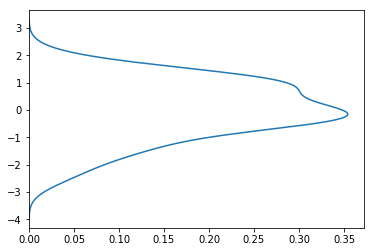

In [19]:
#to plot on vertical axis
sns.kdeplot(data,vertical = True)

# Cumilitive Distribution Function


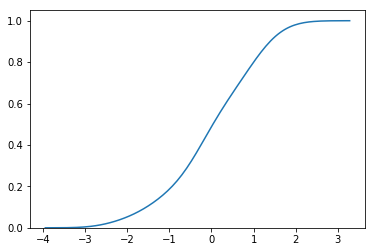

In [20]:
sns.kdeplot(data,cumulative = True)

## For multidimension data

C:\Users\yashm\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


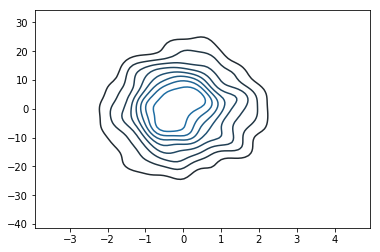

In [21]:
mean = [0,0]

cov = [[1,0],[0,100]]

data2  = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(data2,columns = ['X','Y'])

sns.kdeplot(dframe)

C:\Users\yashm\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


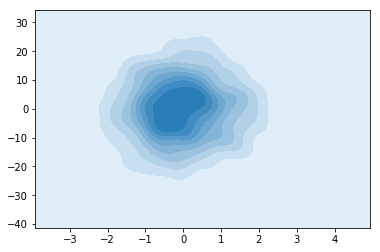

In [22]:
sns.kdeplot(dframe,shade = True)
#Shading

C:\Users\yashm\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


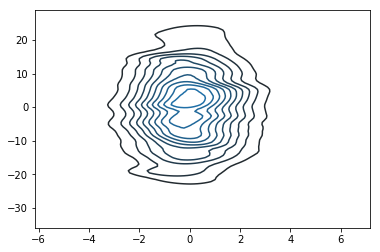

In [23]:
#Also can specify bandwidth
sns.kdeplot(dframe,bw = 1)

C:\Users\yashm\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


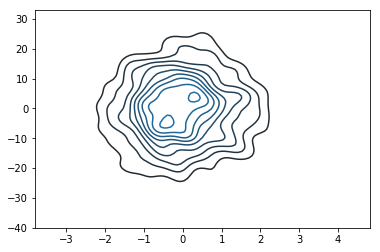

In [24]:
sns.kdeplot(dframe,bw = 'silverman')

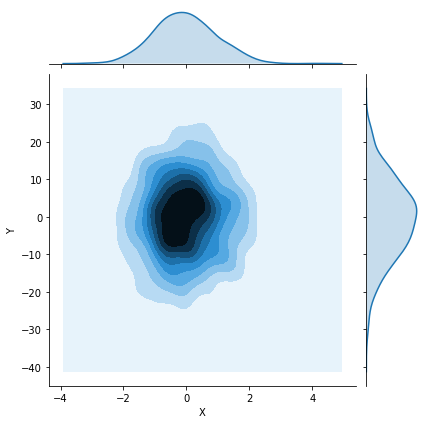

In [25]:
sns.jointplot('X','Y',dframe,kind = 'kde')

# Combine plot styles

In [26]:
data = randn(1000)

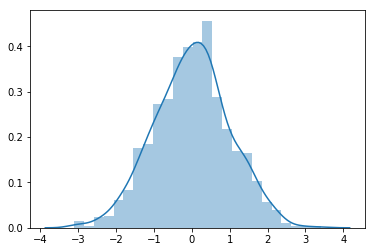

In [27]:
sns.distplot(data,bins = 25)

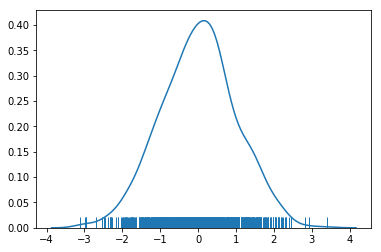

In [28]:
sns.distplot(data,bins = 25,rug = True,hist = False)

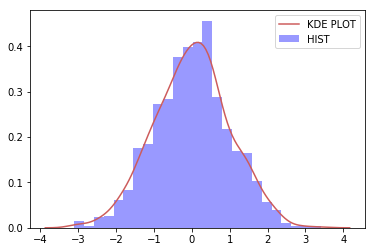

In [29]:
sns.distplot(data,bins = 25, 
             kde_kws = {'color':'indianred','label':'KDE PLOT'}
             ,hist_kws = {'color':'blue','label':'HIST'})

In [30]:
ser1 = pd.Series(data,name = 'My_Data')

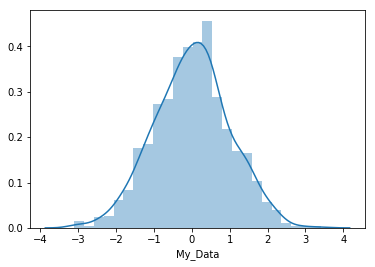

In [31]:
sns.distplot(ser1,bins = 25)

# Box and Violin plots

In [32]:
data1  = randn(100)
data2  = randn(100)

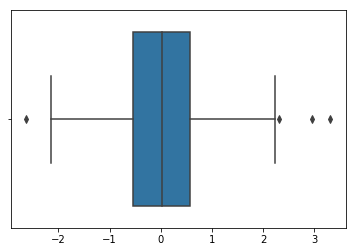

In [33]:
sns.boxplot([data1,data2])

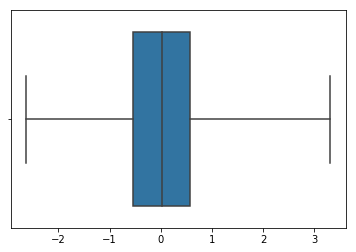

In [34]:
sns.boxplot([data1,data2],whis = np.inf)

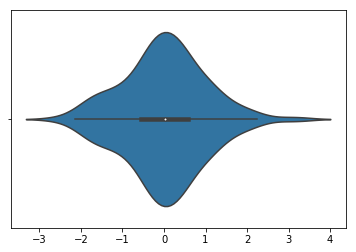

In [35]:
sns.violinplot([data1,data2])

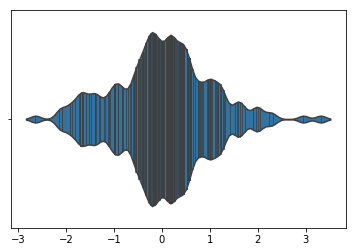

In [36]:
sns.violinplot([data1,data2],bw = 0.1,inner ='stick',horizontal = True)

# Regression plots

In [37]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


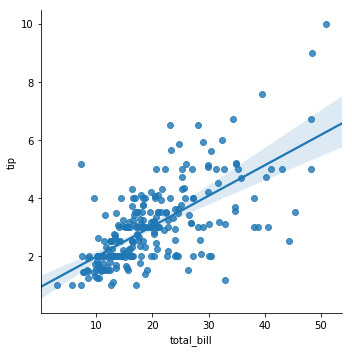

In [38]:
sns.lmplot('total_bill','tip',tips)

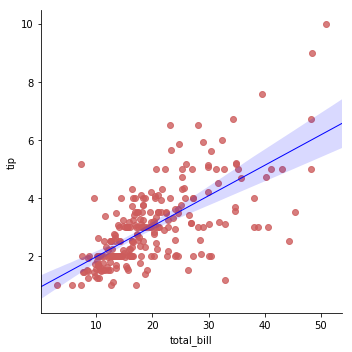

In [39]:
scatter = {'marker':'o','color':'indianred'}
line = {'linewidth':1,'color':'blue'}
sns.lmplot('total_bill','tip',tips,scatter_kws = scatter,line_kws = line)

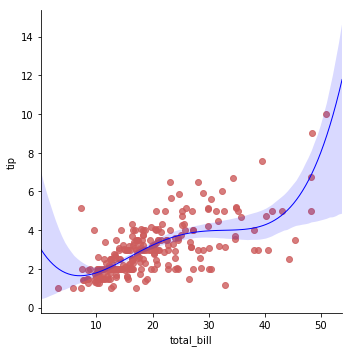

In [40]:
#for a non-linear fit
snsscatter = {'marker':'o','color':'indianred'}
line = {'linewidth':1,'color':'blue'}
sns.lmplot('total_bill','tip',tips,scatter_kws = scatter,line_kws = line,order = 4)

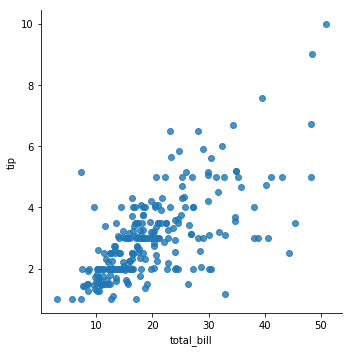

In [41]:
#normal scatterplot
sns.lmplot('total_bill','tip',tips,fit_reg = False)

In [42]:
tips['tip_perc'] = 100*tips['tip']/(tips['total_bill'])

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


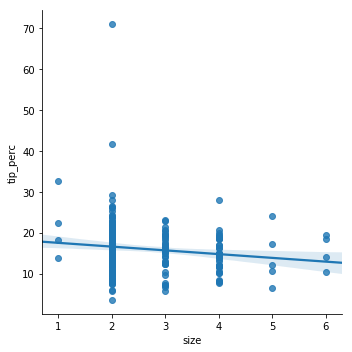

In [44]:
#for discrete variables
sns.lmplot('size','tip_perc',tips)

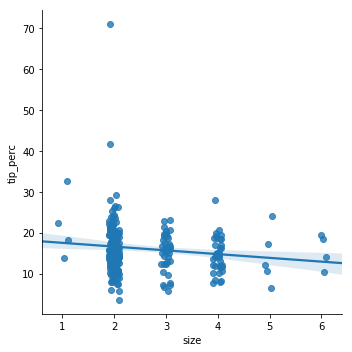

In [45]:
#to add a jitter
sns.lmplot('size','tip_perc',tips,x_jitter = 0.1)

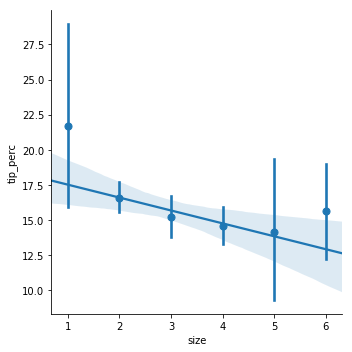

In [46]:
sns.lmplot('size','tip_perc',tips,x_estimator=np.mean)

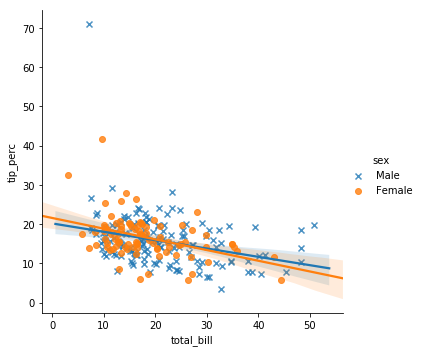

In [47]:
#to create multiple reg and scatter plots
sns.lmplot('total_bill','tip_perc',tips,hue = 'sex',markers=['x','o'])

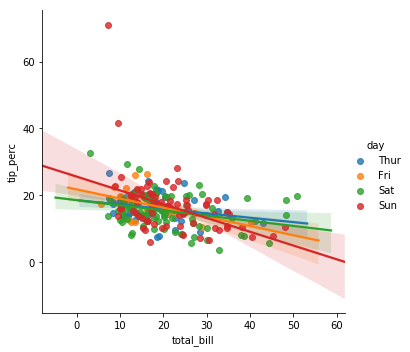

In [48]:
sns.lmplot('total_bill','tip_perc',tips,hue = 'day')

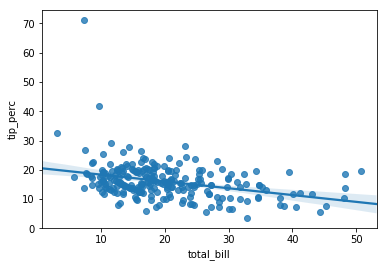

In [49]:
sns.regplot('total_bill','tip_perc',tips)

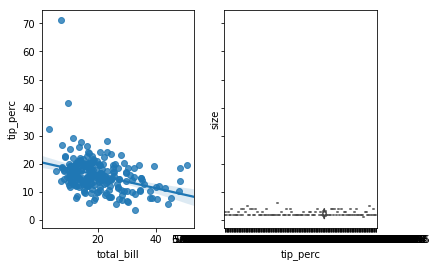

In [50]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey = True)
sns.regplot('total_bill','tip_perc',tips,ax = axis1)
sns.violinplot(tips['tip_perc'],tips['size'],ax = axis2)

# Heatmaps and Clustered Matrices

In [51]:
flight_dframe = sns.load_dataset('flights')

In [52]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [53]:
flight_dframe  = flight_dframe.pivot('month','year','passengers')

In [54]:
flight_dframe.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


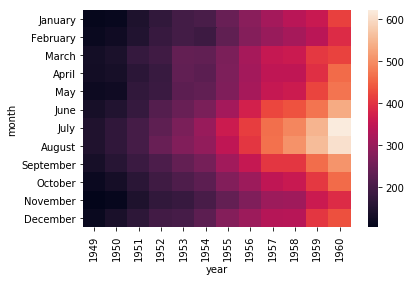

In [55]:
sns.heatmap(flight_dframe)

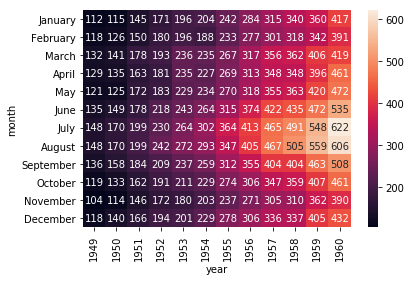

In [56]:
sns.heatmap(flight_dframe,annot = True,fmt = 'd')

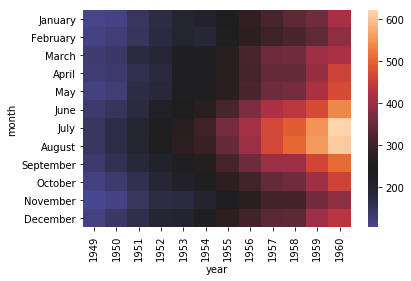

In [57]:
#to specify centre
sns.heatmap(flight_dframe, center=flight_dframe.loc["January", 1955])

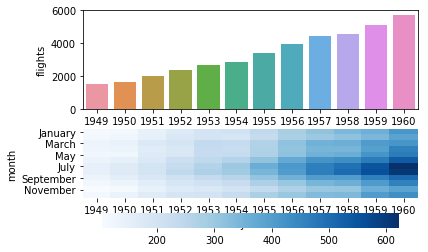

In [58]:
f,(axis1,axis2) = plt.subplots(2,1)

yearly = flight_dframe.sum()
years  = pd.Series(yearly.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly.values)
flights = pd.DataFrame(flights)
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ["year","flights"]

sns.barplot('year',y = 'flights',data = year_dframe,ax =axis1)
sns.heatmap(flight_dframe,cmap = 'Blues',ax = axis2,cbar_kws = {'orientation':'horizontal'})

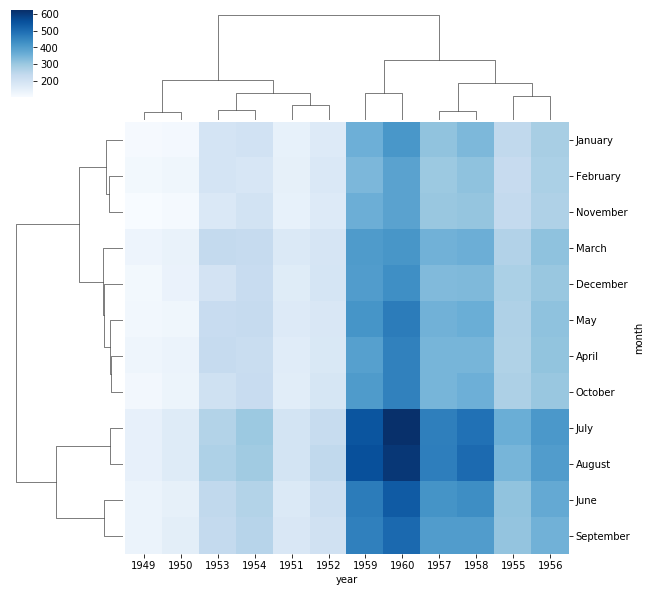

In [59]:
sns.clustermap(flight_dframe,cmap = 'Blues')

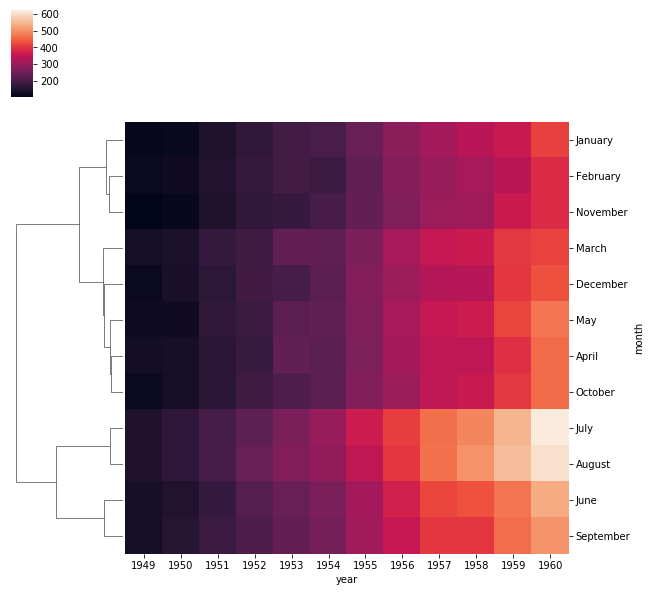

In [60]:
sns.clustermap(flight_dframe,col_cluster=False)

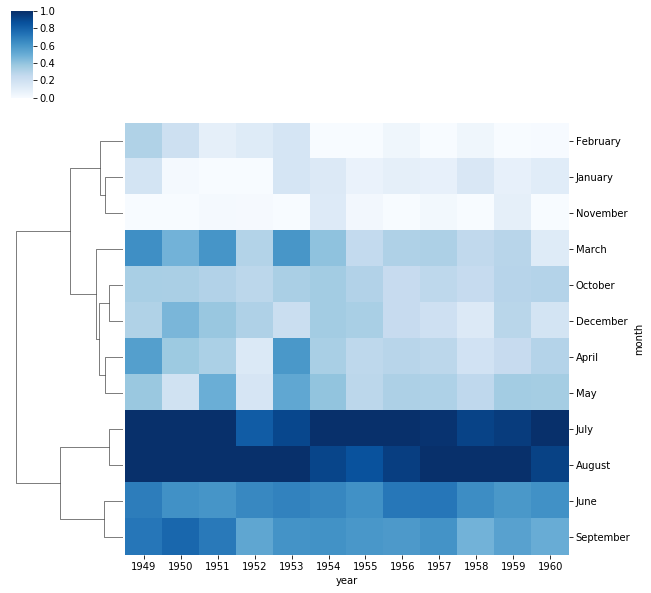

In [61]:
sns.clustermap(flight_dframe,standard_scale=1,col_cluster=False,cmap = 'Blues')

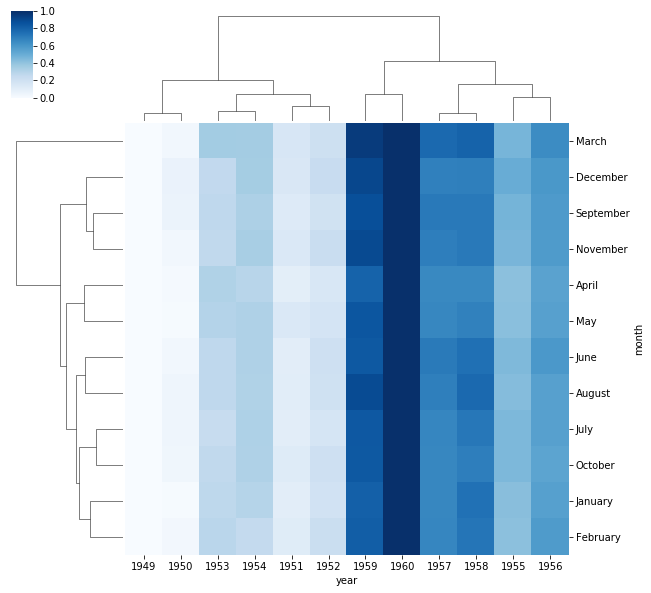

In [62]:
sns.clustermap(flight_dframe,standard_scale=0,cmap = 'Blues')

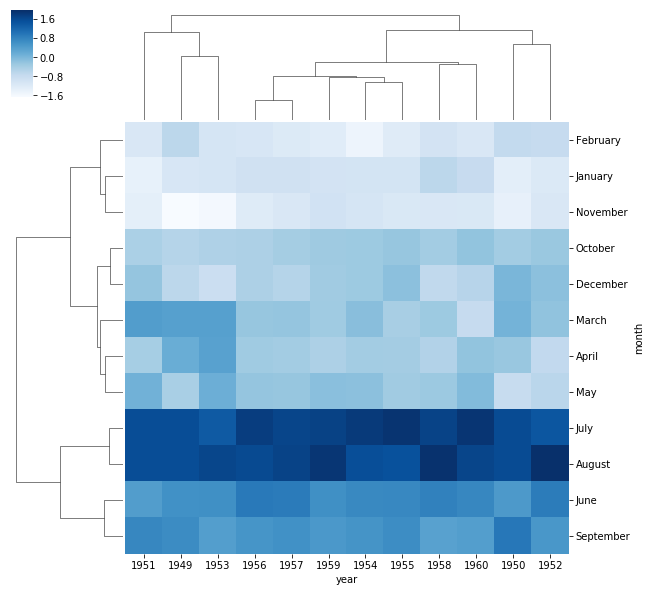

In [63]:
sns.clustermap(flight_dframe,z_score = 1,cmap = 'Blues')